---
layout: default
title: "Unsupervised Learning - Dimensionality Reduction"
categories: Unsupervised
permalink: /ML23/
order: 23
comments: true
---

In [2]:
%pylab --no-import-all inline
plt.rcParams["mathtext.fontset"] = "cm"
import matplotlib.cm as cm

Populating the interactive namespace from numpy and matplotlib


# Dimensionality Reduction
When training a learning algorithm on a training set with hundreds or thousands of features, it is very likely that some of them are redundant as in <a href="#redundantlen">the figure below</a>. Two features do not need to be encoding for the same property to be redundant, it is sufficient that they are highly correlated.

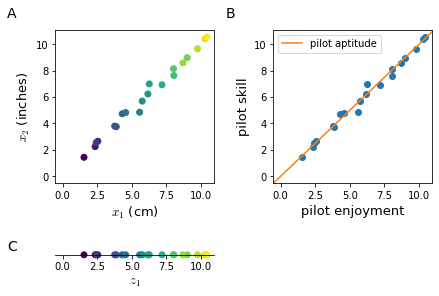

In [85]:
x = np.linspace(1, 10, 20)
noise = np.random.rand(20)

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 2, height_ratios=[3, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1, sharex=ax1)
ax3 = fig.add_subplot(gs[1, 0], sharex=ax2)

ax1.scatter(x+noise, x+noise[::-1], marker='o', c=x)
ax1.set_ylabel('$x_2$ (inches)', fontsize=13)
ax1.set_xlabel('$x_1$ (cm)', fontsize=13)

ax2.scatter(x+noise, x+noise[::-1], marker='o')
ax2.set_ylabel('pilot skill', fontsize=13)
ax2.set_xlabel('pilot enjoyment', fontsize=13)
ax2.axline((0, 0), slope=1, c='C1', label='pilot aptitude')
ax2.legend()

ax3.scatter(x+noise, np.zeros_like(x), c=x)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_position('center')
ax3.set_yticks([])
ax3.set_xlabel('$z_1$', fontsize=13)

ax1.text(-4, 12, 'A', fontsize=14)
ax2.text(-4, 12, 'B', fontsize=14)
ax3.text(-4, 0.01, 'C', fontsize=14);

<i id="redundantlen">Two redundant features (same property in different units of measure, the relationship not being perfectly linear is due to different approximation of the measurements) (A); Two redundant features measuring different but highly correlated properties (B); features space of panel A collapsed in (projected on) a single dimension (C) </i>

Dimensionality reduction is not limited to bi-dimensional data; a typical task of dimensionality reduction could be to reduce a $\mathbb{R}^{1000}$ to a $\mathbb{R}^{100}$ feature space

Dimensionality reduction is used for two main purposes: **data compression** and **data visualization**. Data compression is a label that covers a very wide range of uses, from simply occupying less virtual memory for files in hard disk to speed up learning algorithms; the use of dimensionality reduction for data visualization aims at reducing $n$ features to 2 or 3 features, which are the maximum number of dimensions in a plot.

##  Principal Component Analysis
Principal Component Analysis (PCA) is the most common algorithm for dimensionality reduction.

If we want to reduce data from 2 dimensions to 1 dimension (<a href="#pcaline">the figure below</a>), the goal of PCA is to find a vector $u^{(1)} \in \mathbb{R^n}$ onto which to project the data so as to minimize the projection error.

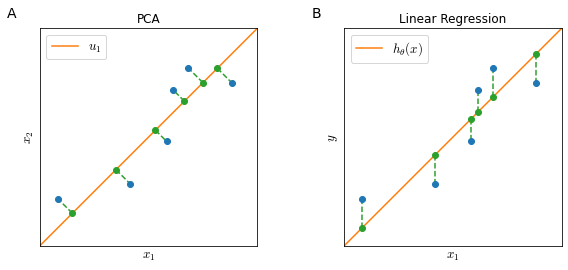

In [84]:
xv = np.linspace(1, 3, 6)
noise = np.random.rand(6) -.5
xv, yv = xv+noise, xv+noise[::-1]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax1, ax2 = axes

for xori, xp, yp in zip(x, xv, yv):
    l = np.array([3, 3])
    coords = np.array([xp, yp])
    p = l * np.dot(coords, l) / np.dot(l, l)
    ax1.plot(*np.c_[p, coords], marker='o', c='C2', markevery=[0], ls='--' ,zorder=-1)
    ax2.plot([xp, xp], [xp, yp], marker='o', c='C2', markevery=[0], ls='--' ,zorder=-1)
    
ax1.set_ylabel('$x_2$', fontsize=13)
ax2.set_ylabel('$y$', fontsize=13)
ax1.set_title('PCA')
ax2.set_title('Linear Regression')
ax1.axline((1, 1), slope=1, c='C1', zorder=-2, label='$u_1$')
ax2.axline((1, 1), slope=1, c='C1', zorder=-2, label='$h_\\theta(x)$')

for ax, l in zip(axes, ['A', 'B']):
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('$x_1$', fontsize=13)
    ax.scatter(xv, yv)
    ax.set_xlim(.5, 3.5)
    ax.set_ylim(.5, 3.5)
    ax.text(-0.15, 1.1, l, transform=ax.transAxes, fontsize=14, va='top')
    ax.legend(fontsize=13)

<i id="pcaline">Distance calculation for PCA in the linear case (A) and linear regression (B).</i>

In $n$ dimensions PCA tries to find a surface with a smaller number of dimensions $k$ ($k$ vectors $u^{(1)}, u^{(2)}, \ldots, u^{(k)}$) on which to project the data so that the sum of squares of the projections distance (projection error) is minimized.

### PCA vs Linear Regression
While it may be cosmetically similar, there is substantial difference between PCA and linear regression. 

In linear regression (<a href="#pcaline">figure above</a>, panel B) we try to predict some value $y$ given some input feature $x_1$  and in training linear regression we try to minimize the **vertical distance** between $x_1, y$ points and a straight line.

In PCA (<a href="#pcaline">the figure above</a>, panel A) there is no variable $y$: we try to reduce the dimensionality of a feature space $x_1, x_2$ by minimizing the **projection error** of feature points and a straight line.

## PCA algorithm
### Preprocessing
For PCA to work properly is essential to pre-process data. 

With **mean normalization** we replace each $x_j^{(i)}$ with $x_j - \mu_j$, where 

$$\mu_j = \frac{1}{m}\sum^m_{i=1}x_j^{(i)}$$

If different features are on different scales we need to **scale features** to a comparable range of values 

$$\frac{x_j - \mu_j}{s_j}$$

where $s_j$ is a measure of the range of values of $x_j$, commonly the standard deviation.

### Dimensionality reduction
The objective of PCA is to project a higher number of dimensions $n$ on a lower number of dimensions $k$ (defined by $k$ vectors $ \{u_1, u_2, \ldots, u_k \}$), as shown in <a href="#redundantlen">figure above</a>, panels A and C.

The mathematical proof of this process is rather complex but the procedure is instead quite simple.

The first step in the PCA algorithm is the calculation of the [covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix) $\Sigma$, which will be an $n \times n$ matrix

$$
\Sigma = \frac{1}{m} \sum^n_{i=1} \left ( x^{(i)} \right )\left ( x^{(i)} \right )^T
$$

and then calculate the [eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) of $\Sigma$. Since $\Sigma$ is a [symmetric positive definite matrix](https://en.wikipedia.org/wiki/Definite_symmetric_matrix) you usually calculate the eigenvectors with [Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) (SVD). 

SVD outputs three matrices $U, S, V$, of which we are interested in the $U$ matrix. This will also be an $n \times n$ matrix, whose columns represents the vectors $u$.

$$
U=
\begin{bmatrix}
| & | &  & | \\
u^{(1)} & u^{(2)} & \cdots & u^{(n)} \\
| & | &  & | \\
\end{bmatrix} \in \mathbb{R}^{n \times n}
$$

To obtain the reduced space described by $k$ vectors $u$ we just take the first $k$ columns from the matrix $U$.

$$
U_\text{reduce}=
\begin{bmatrix}
| & | &  & | \\
u^{(1)} & u^{(2)} & \cdots & u^{(k)} \\
| & | &  & | \\
\end{bmatrix} \in \mathbb{R}^{n \times k}
$$

And the projection of features $x \in \mathbb{R}^n$ to components $z \in \mathbb{R}^k$ is calculated as 

$$
z = U_\text{reduce}^T x 
$$

and since $U_\text{reduce}^T \in \mathbb{R}^{k \times n}$ and $x \in \mathbb{R}^{n \times 1}$, then $z \in \mathbb{R}^{k \times 1}$ or $z \in \mathbb{R}^k$